In [146]:
# generate random floating point values
from random import seed
from random import random
from random import randint
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from itertools import chain
from collections import OrderedDict
import math 

In [147]:
nodes=[i for i in range(1,21)]
pairs = list(combinations(nodes, 2))
#print(pairs)

In [148]:
n=len(nodes)
p=0.38
edge_list=list()

for i in pairs:
    gen_prob=randint(0,1)
    if gen_prob<p:
        edge_list.append(i)
    else:
        pass
#print(edge_list)


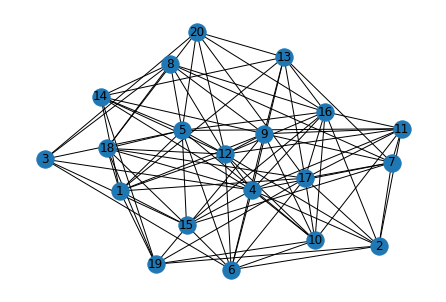

In [149]:
G = nx.Graph()

G.add_nodes_from(list(nodes))
G.add_edges_from(edge_list)

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

{1: 9, 5: 12, 9: 10, 12: 13, 13: 8, 14: 8, 15: 8, 17: 11, 18: 9, 19: 7, 2: 8, 4: 12, 6: 9, 7: 8, 11: 9, 16: 11, 3: 6, 8: 8, 20: 7, 10: 9}


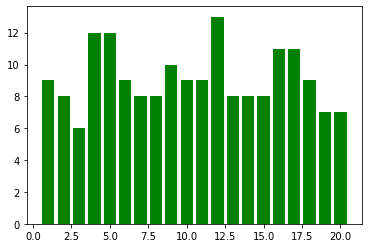

In [150]:
EdgeList = [i for j in edge_list for i in j]
def countX(EdgeList, x):
    return EdgeList.count(x)
dict_degree ={}

for x in EdgeList:
    case = {x:countX(EdgeList, x)}
    dict_degree.update(case)
#dict_degree = OrderedDict(sorted(dict_degree.items()))    
print(dict_degree)

plt.bar(dict_degree.keys(), dict_degree.values(), color='g')
plt.show()

{1: 9, 5: 12, 9: 10, 12: 13, 13: 8, 14: 8, 15: 8, 17: 11, 18: 9, 19: 7, 2: 8, 4: 12, 6: 9, 7: 8, 11: 9, 16: 11, 3: 6, 8: 8, 20: 7, 10: 9}
[9, 12, 10, 13, 8, 8, 8, 11, 9, 7, 8, 12, 9, 8, 9, 11, 6, 8, 7, 9]
{9: 5, 12: 2, 10: 1, 13: 1, 8: 6, 11: 2, 7: 2, 6: 1}


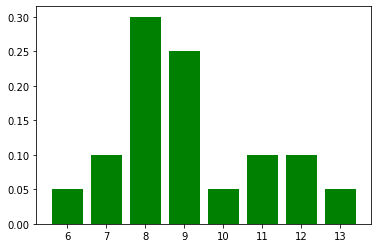

In [151]:
#degree distribution
print(dict_degree)
degrees = dict_degree.values()

degrees_list = list(degrees) 
print(degrees_list)

dict_degrees = {}
for x in degrees_list:
    case = {x:countX(degrees_list, x)}
    dict_degrees.update(case)
print(dict_degrees)

probs = list()
for key, value in dict_degrees.items(): 
    probs.append(value/n)
#print(probs)

numdegrees = dict_degrees.keys()

plt.bar(numdegrees,probs,color='g')
plt.show()


In [153]:
#Theoretical average degre is mu.
mu = n*p
print("Theoretical average degree is", mu)
#Empirical average degree 

total_degrees = sum(degrees_list)
L = total_degrees*(1/2)
k = (2*L)/n #average degree
print("Empirical average degree is", k)




Theoretical average degree is 7.6
Empirical average degree is 9.1
